<a href="https://colab.research.google.com/github/DeepthiTabithaBennet/Python_DeepLearning/blob/main/MultipleLinearRegressionUsingANN_HousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Prediction Using ANN**

In [ ]:
# SOURCE - https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/

import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import r2_score

In [ ]:
# Training Data
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
train_data = pd.read_csv(TRAIN_DATA_PATH)

# Testing Data
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
test_data = pd.read_csv(TEST_DATA_PATH)

# Target Variable
TARGET_NAME = 'median_house_value'

In [ ]:
x_train = train_data.drop(TARGET_NAME, axis=1)
y_train = train_data[TARGET_NAME]

x_test = test_data.drop(TARGET_NAME, axis=1)
y_test =  test_data[TARGET_NAME]

In [ ]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
y_train.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [ ]:
y_train.unique()

array([ 66900.,  80100.,  85700., ..., 119700.,  75100.,  80500.])

In [ ]:
learning_rate = 0.001

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(160, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(480, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(256, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values,
    y_train.values,
    epochs = 100,
    batch_size = 64,
    validation_split = 0.2
)

Epoch 1/100
213/213 [==============================] - 4s 12ms/step - loss: 0.1009 - mean_squared_logarithmic_error: 0.1009 - val_loss: 0.2488 - val_mean_squared_logarithmic_error: 0.2466
Epoch 2/100
213/213 [==============================] - 2s 7ms/step - loss: 0.1012 - mean_squared_logarithmic_error: 0.1012 - val_loss: 0.1612 - val_mean_squared_logarithmic_error: 0.1600
Epoch 3/100
213/213 [==============================] - 2s 7ms/step - loss: 0.1011 - mean_squared_logarithmic_error: 0.1010 - val_loss: 0.1665 - val_mean_squared_logarithmic_error: 0.1654
Epoch 4/100
213/213 [==============================] - 2s 8ms/step - loss: 0.1033 - mean_squared_logarithmic_error: 0.1033 - val_loss: 0.1839 - val_mean_squared_logarithmic_error: 0.1826
Epoch 5/100
213/213 [==============================] - 2s 7ms/step - loss: 0.1007 - mean_squared_logarithmic_error: 0.1007 - val_loss: 0.1540 - val_mean_squared_logarithmic_error: 0.1528
Epoch 6/100
213/213 [==============================] - 2s 8ms/st

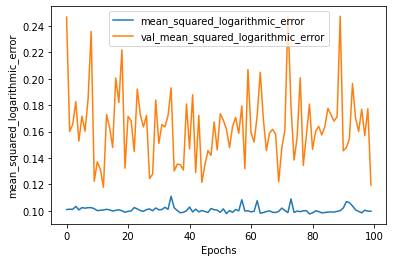

In [ ]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()

# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

94/94 [==============================] - 0s 3ms/step
[[383798.9  ]
 [179768.53 ]
 [301399.1  ]
 ...
 [ 91548.984]
 [101945.625]
 [442957.3  ]]


In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.6614105258024758


In [ ]:
op = model.predict([[-114.31, 34.19, 15.0, 5612.0, 1283.0, 1015.0, 472.0, 1.4936]])
print(op[0][0])

1/1 [==============================] - 0s 138ms/step
87610.88
